In [1]:
import ee
# Initialize the Earth Engine API
ee.Initialize()


*** Earth Engine *** Share your feedback by taking our Annual Developer Satisfaction Survey: https://google.qualtrics.com/jfe/form/SV_7TDKVSyKvBdmMqW?ref=4i2o6


In [5]:
import geemap

# Create a map centered on a location
Map = geemap.Map()

# Set the map style to hybrid (satellite + labels)
Map.add_basemap('HYBRID')

# Display the map
Map


Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], position='topright', transp…

In [ ]:
print('hello')


hello


Accuracy: 0.8350
              precision    recall  f1-score   support

        Bare       1.00      0.30      0.46        10
   Developed       1.00      0.47      0.64        19
      Forest       0.89      0.50      0.64       164
  Herbaceous       0.88      0.92      0.90       440
       Shrub       0.79      0.90      0.84       488
       Water       1.00      0.83      0.91        12

    accuracy                           0.83      1133
   macro avg       0.93      0.65      0.73      1133
weighted avg       0.84      0.83      0.83      1133

Top 20 features:
   feature  importance
2      A02    0.061620
50     A50    0.041665
51     A51    0.038529
22     A22    0.034665
12     A12    0.032014
10     A10    0.027754
1      A01    0.021272
19     A19    0.021127
36     A36    0.020553
35     A35    0.020246
61     A61    0.020126
25     A25    0.019548
54     A54    0.017444
8      A08    0.017248
63     A63    0.017113
29     A29    0.016669
27     A27    0.016511
5      A0

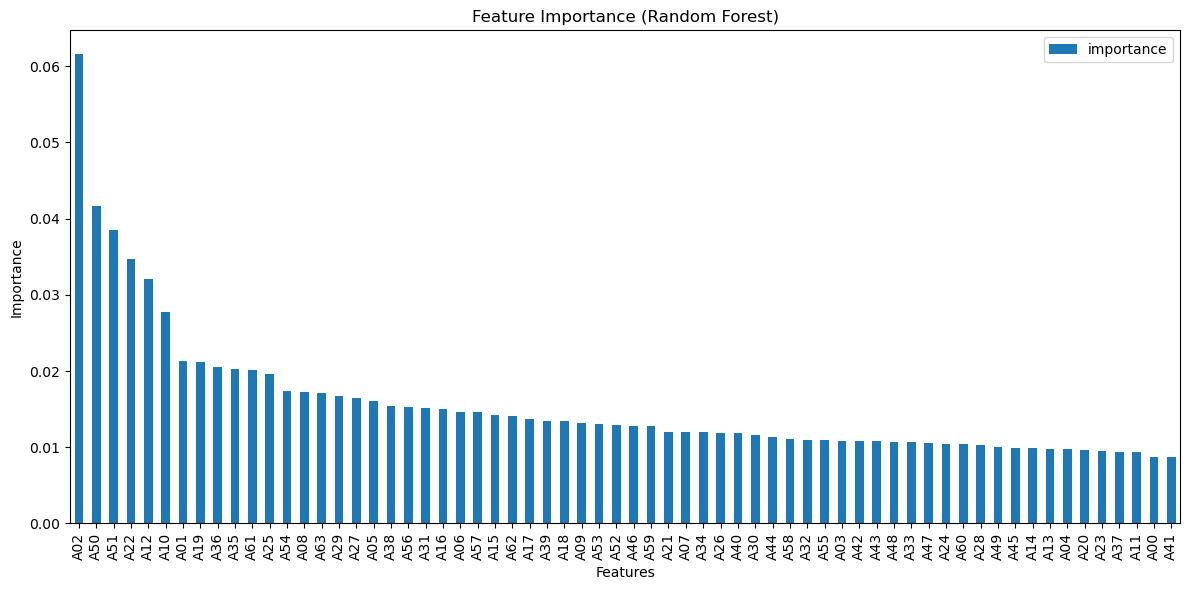

In [ ]:
# 必要库
import ee
import geemap
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# 初始化 Earth Engine
ee.Initialize()

samples_fc = ee.FeatureCollection('projects/GLANCE/SCRATCH/TEST_EMBEDDINGS_10m_AF_Training_Master_V1_2025_09_04_filtered_predictors_subrealm_19_all')  # 直接使用全部样本点
df_samples = geemap.ee_to_gdf(samples_fc)

# 5) 特征/标签准备
band_names = [f"A{i:02d}" for i in range(64)]  # A00 ~ A63
features = band_names
target = 'LC_Class'

# 取出特征与标签
X = df_samples[features]
y = df_samples[target]

# 缺失值处理与索引对齐
X = X.fillna(X.median(numeric_only=True))
y = y.dropna()
X = X.loc[y.index]

# 6) 训练/验证集划分
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 7) 训练随机森林模型
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# 简要评估
y_pred = rf_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

# 8) 计算与展示特征重要度（基于平均不纯度下降，MDI）
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 20 features:")
print(feature_importance.head(20))

# Top 20 重要度占比
total_importance_top20 = feature_importance.head(20)['importance'].sum()
print(f"\nTotal importance of top 20 features: {total_importance_top20:.4f}")

# 可视化
ax = feature_importance.plot(kind='bar', x='feature', y='importance', figsize=(12, 6))
ax.set_title('Feature Importance (Random Forest)')
ax.set_xlabel('Features')
ax.set_ylabel('Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [11]:
df_samples.head()


,geometry,A00,A01,A02,A03,A04,A05,A06,A07,A08,...,precip,rand,random,recentMag,recent_mag,systemind,trainYear,user,userId,waterDef
0,POINT (35.19237 37.71822),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,54.746154,NaN,0.000011,0.000000,NaN,,2017.5,kmcavoy,None,296.511538
1,POINT (-0.91269 40.14922),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38.732051,NaN,0.000037,0.000000,NaN,19_00000000000000000b9e,2018.5,kmcavoy,None,470.815385
2,POINT (31.55845 -23.71341),0.088827,0.113741,-0.059116,0.186082,-0.055363,0.098424,0.084214,0.251965,-0.062991,...,37.928030,NaN,0.297912,-0.056591,NaN,None,2017.5,ytzhang,,826.309343
3,POINT (31.38319 -21.12394),0.108512,0.259900,0.119093,0.066990,-0.032541,-0.038447,0.141730,0.251965,-0.147697,...,48.367424,NaN,0.162943,-0.085458,NaN,None,2017.5,ytzhang,,863.821970
4,POINT (31.38466 -21.12241),0.103406,0.236463,0.108512,0.038447,-0.048228,-0.012057,0.160000,0.259900,-0.172795,...,48.367424,NaN,0.036877,0.068797,NaN,None,2017.5,ytzhang,,863.821970


In [12]:
df_samples.head()


,geometry,A00,A01,A02,A03,A04,A05,A06,A07,A08,...,precip,rand,random,recentMag,recent_mag,systemind,trainYear,user,userId,waterDef
0,POINT (35.19237 37.71822),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,54.746154,NaN,0.000011,0.000000,NaN,,2017.5,kmcavoy,None,296.511538
1,POINT (-0.91269 40.14922),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38.732051,NaN,0.000037,0.000000,NaN,19_00000000000000000b9e,2018.5,kmcavoy,None,470.815385
2,POINT (31.55845 -23.71341),0.088827,0.113741,-0.059116,0.186082,-0.055363,0.098424,0.084214,0.251965,-0.062991,...,37.928030,NaN,0.297912,-0.056591,NaN,None,2017.5,ytzhang,,826.309343
3,POINT (31.38319 -21.12394),0.108512,0.259900,0.119093,0.066990,-0.032541,-0.038447,0.141730,0.251965,-0.147697,...,48.367424,NaN,0.162943,-0.085458,NaN,None,2017.5,ytzhang,,863.821970
4,POINT (31.38466 -21.12241),0.103406,0.236463,0.108512,0.038447,-0.048228,-0.012057,0.160000,0.259900,-0.172795,...,48.367424,NaN,0.036877,0.068797,NaN,None,2017.5,ytzhang,,863.821970


Top 20 features by Permutation Importance:
   feature  permutation_importance_mean  permutation_importance_std
2      A02                     0.037688                    0.006365
50     A50                     0.030715                    0.003391
51     A51                     0.021977                    0.004072
22     A22                     0.018005                    0.002594
12     A12                     0.016858                    0.004241
36     A36                     0.010415                    0.002785
6      A06                     0.007855                    0.001870
10     A10                     0.007767                    0.003613
56     A56                     0.007590                    0.002712
25     A25                     0.006708                    0.002769
57     A57                     0.006355                    0.002975
63     A63                     0.005914                    0.003232
61     A61                     0.005560                    0.002337
31   

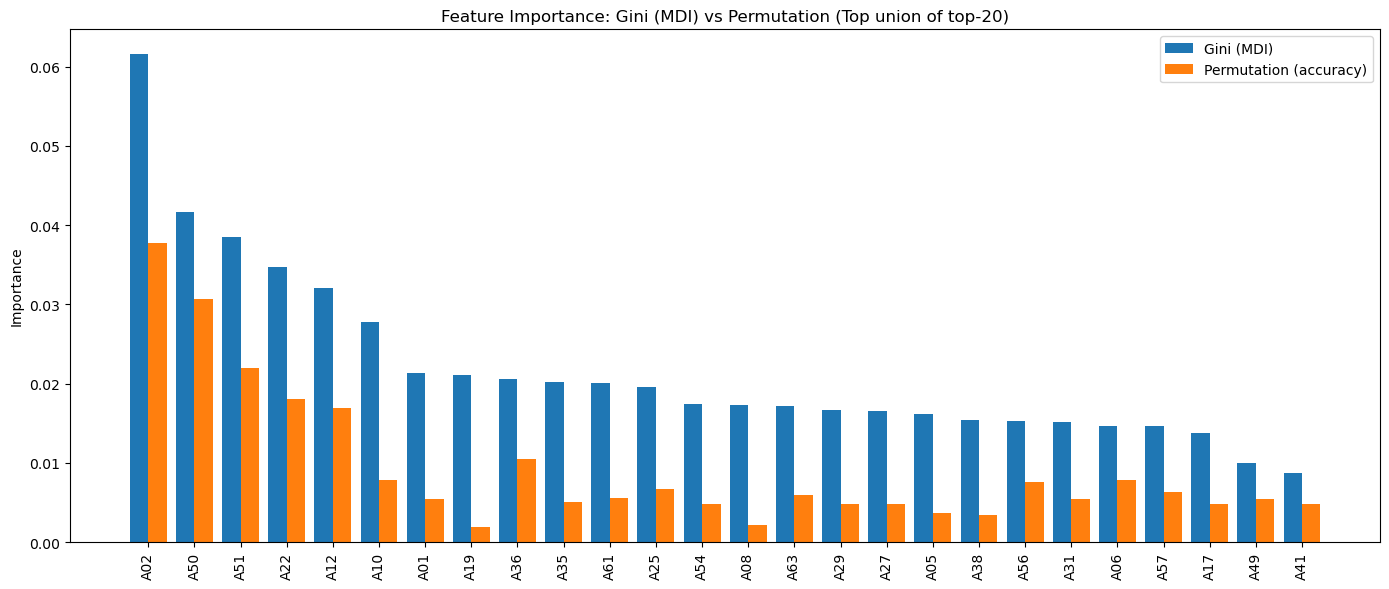

In [13]:
# 9) 基于Permutation的重要度（在测试集上，评估指标=accuracy）
from sklearn.inspection import permutation_importance
import numpy as np

# 计算 permutation importance（为了稳定性设置 n_repeats，可按需增大）
perm_result = permutation_importance(
    rf_model, X_test, y_test,
    n_repeats=10,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
 )

perm_importance_df = pd.DataFrame({
    'feature': X_test.columns,
    'permutation_importance_mean': perm_result.importances_mean,
    'permutation_importance_std': perm_result.importances_std
}).sort_values('permutation_importance_mean', ascending=False)

print("Top 20 features by Permutation Importance:")
print(perm_importance_df.head(20))

# 10) 与 Gini(MDI) 重要度对齐并对比
gini_df = feature_importance.rename(columns={'importance': 'gini_importance'})
compare_df = pd.merge(gini_df, perm_importance_df, on='feature', how='outer').fillna(0.0)

# 计算两种重要度的相关性
pearson_corr = compare_df['gini_importance'].corr(compare_df['permutation_importance_mean'])
print(f"\nPearson correlation between Gini (MDI) and Permutation importance: {pearson_corr:.4f}")

# 11) 可视化：并排柱状图展示前20或并集TOP
top_k = 20
top_features = list(set(gini_df.head(top_k)['feature']).union(set(perm_importance_df.head(top_k)['feature'])))
top_compare = compare_df.set_index('feature').loc[top_features].sort_values('gini_importance', ascending=False)

fig, ax = plt.subplots(1, 1, figsize=(14, 6))
width = 0.4
idx = np.arange(len(top_compare))
ax.bar(idx - width/2, top_compare['gini_importance'].values, width=width, label='Gini (MDI)')
ax.bar(idx + width/2, top_compare['permutation_importance_mean'].values, width=width, label='Permutation (accuracy)')
ax.set_xticks(idx)
ax.set_xticklabels(top_compare.index, rotation=90)
ax.set_title('Feature Importance: Gini (MDI) vs Permutation (Top union of top-20)')
ax.set_ylabel('Importance')
ax.legend()
plt.tight_layout()
plt.show()


In [14]:
# 12) 分别打印 Gini (MDI) 和 Permutation 的 Top-20 特征，并输出两者的交集
top20_gini = feature_importance.head(20)['feature'].tolist()
print('Top 20 features by Gini (MDI):')
print(top20_gini)

top20_perm = perm_importance_df.head(20)['feature'].tolist()
print('\nTop 20 features by Permutation (accuracy):')
print(top20_perm)

# 交集与差异
intersection = list(set(top20_gini).intersection(top20_perm))
only_gini = [f for f in top20_gini if f not in intersection]
only_perm = [f for f in top20_perm if f not in intersection]

print(f"\nNumber of overlapping features in top-20: {len(intersection)}")
print('Overlapping features:', sorted(intersection))
print('\nFeatures only in Gini top-20:', only_gini)
print('\nFeatures only in Permutation top-20:', only_perm)


Top 20 features by Gini (MDI):
['A02', 'A50', 'A51', 'A22', 'A12', 'A10', 'A01', 'A19', 'A36', 'A35', 'A61', 'A25', 'A54', 'A08', 'A63', 'A29', 'A27', 'A05', 'A38', 'A56']

Top 20 features by Permutation (accuracy):
['A02', 'A50', 'A51', 'A22', 'A12', 'A36', 'A06', 'A10', 'A56', 'A25', 'A57', 'A63', 'A61', 'A31', 'A01', 'A49', 'A35', 'A17', 'A41', 'A29']

Number of overlapping features in top-20: 14
Overlapping features: ['A01', 'A02', 'A10', 'A12', 'A22', 'A25', 'A29', 'A35', 'A36', 'A50', 'A51', 'A56', 'A61', 'A63']

Features only in Gini top-20: ['A19', 'A54', 'A08', 'A27', 'A05', 'A38']

Features only in Permutation top-20: ['A06', 'A57', 'A31', 'A49', 'A17', 'A41']
